### ANALYSE DU DATASET DU DIABETE POUR SAVOIR SI UN PATIENT PEUT L'AVOIR OU NON
### On utilisear seulement l'algoritme de regression logistique comme model de prediction
### La dataset nous viens de Kaggle
### Objectif :     
  - Montrer Comment utliser la regression logistique et faire un essaie d'optimisation
  - On va juste voir comment utiliser la regression logistique qui est très bien quand veut faire un model de prediction et qu'on a beaucoup de colonne 
  - Après l'élaboration du model on pourrais essayé de l'optimisé en jouant un peut sur les hyper param_tre 
  - lien de la dataset : https://www.kaggle.com/datasets/mathchi/diabetes-data-set


In [31]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Importation de la dataset 
df = pd.read_csv('diabetes.csv')

In [4]:
# Visualiser les données
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Regarder les dimensions de notre dataset
df.shape

(768, 9)

In [14]:
# voir les valeurs dupliqués 
df.duplicated().sum()

0

In [15]:
# Voir les valeurs manquantes 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

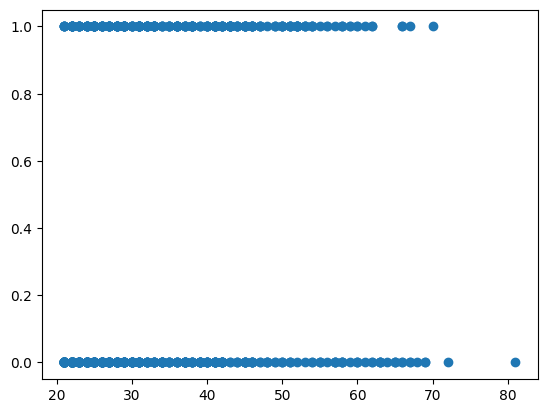

In [6]:
# essayé de voir si il existe une relation entre le taux de glucose et la target outcome
plt.scatter(df.Age,df.Outcome)

<Axes: xlabel='Insulin', ylabel='count'>

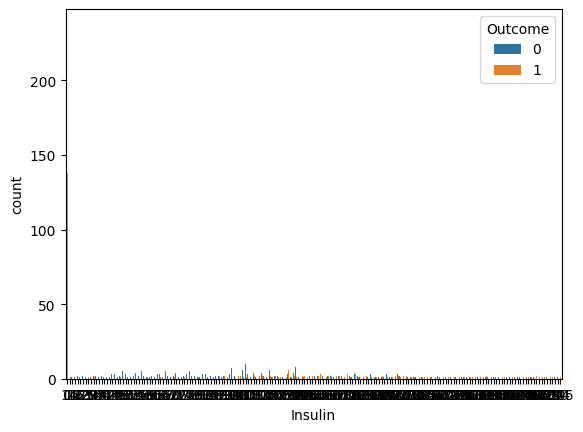

In [34]:
sns.countplot(x='Insulin', hue='Outcome',data=df)

In [8]:
# définir les features et les targets 
X = df.drop('Outcome',axis =1)
y = df['Outcome']

<Axes: >

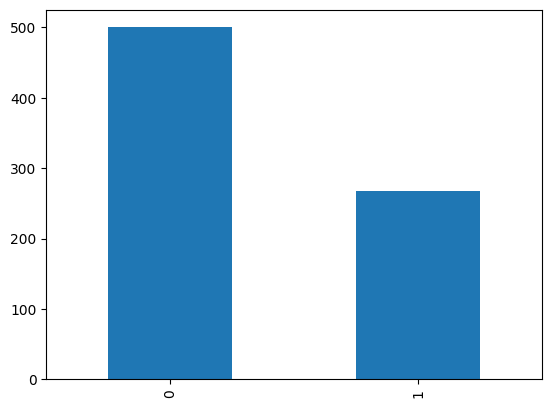

In [49]:
df['Outcome'].value_counts().plot.bar()

Notre dataset est totalement deéquilibré mais l'objectif ici est juste de voir comment utilisé la regression logistique

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
# diviser le dataset en training et en testset  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 123)

In [18]:
# Construction de notre model 
classifier = LogisticRegression(solver='liblinear', random_state=123)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [19]:
# Faire de nouvelle prediction 
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.7857142857142857

[[93  8]
 [25 28]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       101
           1       0.78      0.53      0.63        53

    accuracy                           0.79       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.79      0.77       154



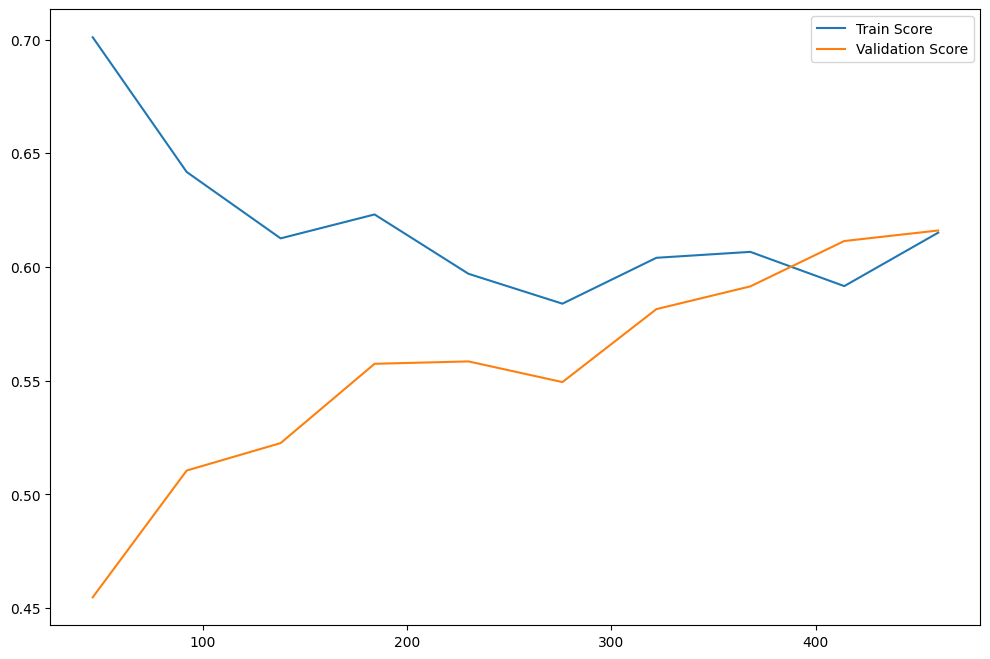

In [32]:
# On va voir ces metrics 
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4,scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = 'Train Score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation Score')
plt.legend()

In [24]:
# Faire une nouvelle prediction 
classifier.predict([[6,110,72,23,80,33.4,0.167,23]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [45]:
# Essaie d'optimisation
classifier = LogisticRegression(solver='liblinear', random_state=123, fit_intercept = True, max_iter = 200,n_jobs= 1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.7857142857142857

Malgré tous les essai  on vois qu'on arrive pas à obtenir un meilleur score 